In [1]:
subject_id = "401"

manifest_path="/scratch/gilbreth/akamsali/Research/Makin/ecog2txt-pytorch/conf/mocha-1_word_sequence.yaml"

In [2]:
from ecog2txt_pytorch.trainers.single_subject_trainer import SingleSubjectTrainer

trainer = SingleSubjectTrainer(subject_id=subject_id, manifest_path=manifest_path)

words, training_metrics = trainer.train_and_evaluate()

/scratch/gilbreth/akamsali/Research/Makin/ecog2txt-pytorch/ecog2txt_pytorch/trainers/single_subject_trainer.py:37: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  manifest_file = yaml.load(f)


pad: 0 eos:  1 sos:  3
ind:  0
left_out 4
Reset trainable parameters of layer = Conv1d(429, 256, kernel_size=(3,), stride=(1,))
Reset trainable parameters of layer = Linear(in_features=256, out_features=1807, bias=True)
epoch_10: Train_loss: 3.265,Val loss: 2.814, Epoch time = 2.645s
Val WER: 0.811, Inf_time=1.238s
epoch_20: Train_loss: 1.212,Val loss: 1.010, Epoch time = 2.164s
Val WER: 0.786, Inf_time=1.190s
epoch_30: Train_loss: 0.404,Val loss: 0.522, Epoch time = 2.163s
Val WER: 0.538, Inf_time=1.233s
epoch_40: Train_loss: 0.109,Val loss: 0.393, Epoch time = 2.167s
Val WER: 0.426, Inf_time=1.144s
epoch_50: Train_loss: 0.034,Val loss: 0.357, Epoch time = 2.163s
Val WER: 0.499, Inf_time=1.220s
epoch_60: Train_loss: 0.013,Val loss: 0.312, Epoch time = 2.377s
Val WER: 0.447, Inf_time=1.147s
epoch_70: Train_loss: 0.005,Val loss: 0.311, Epoch time = 2.164s
Val WER: 0.479, Inf_time=1.230s
epoch_80: Train_loss: 0.003,Val loss: 0.281, Epoch time = 2.170s
Val WER: 0.420, Inf_time=1.150s
epoc

In [3]:
import json

with open('metrics.json', 'w') as f:
    json.dump(training_metrics,f)

In [4]:
with open('words.json', 'w') as fwords:
    json.dump(words, fwords)

In [15]:
import matplotlib.pyplot as plt
import numpy as np


a = training_metrics
epochs = np.arange(1,101)

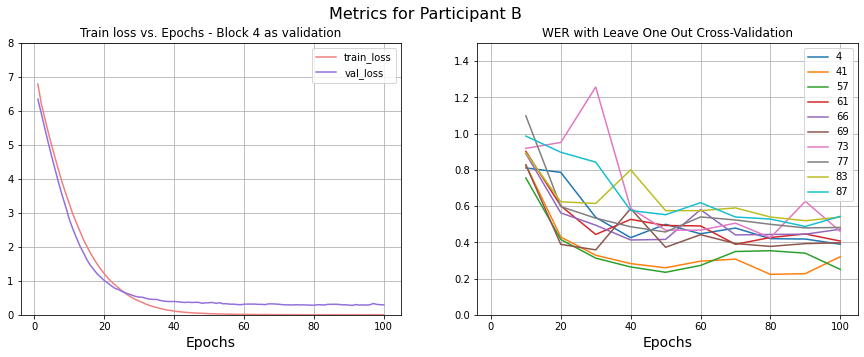

In [31]:
fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                figsize=(15, 5))
ax0.set_title('Train loss vs. Epochs - Block 4 as validation')
#print(a[block]['train_loss'])
ax0.plot(epochs, a['4']['train_loss'], color='lightcoral', label='train_loss')
ax0.plot(epochs, a['4']['val_loss'], color='mediumpurple', label='val_loss')
ax0.set_ylim(0, 8.0)
ax0.set_xlabel("Epochs", fontsize=14)
ax0.legend()
ax0.grid()
ax2.set_title('WER with Leave One Out Cross-Validation')

for block in a:
    ax2.plot(np.arange(1,11)*10, a[block]['val_WER'], label=block)

ax2.set_ylim(0,1.5)
ax2.set_xlabel("Epochs", fontsize=14)    
ax2.legend()
ax2.grid()
    
fig.suptitle("Metrics for Participant B", fontsize=16)
plt.show()



In [33]:
x = list(map(lambda x: (' '.join(x[0]),' '.join(x[1])) , list(zip(words['57']['tgt'][7][:10], words['57']['pred'][7][:10]))))

for y in x:
    print("[ ", y[0]," ], [ ", y[1], " ]")

young_ people_ participate_ in_ athletic_ activities_ <EOS> young_ people_ participate_ in_ athletic_ activities_ <EOS>
a_ roll_ of_ wire_ lay_ near_ the_ wall_ <EOS> a_ roll_ of_ wire_ lay_ near_ the_ wall_ <EOS>
where_ were_ you_ while_ we_ were_ away_ <EOS> where_ were_ you_ while_ we_ were_ away_ <EOS>
only_ lawyers_ love_ millionaires_ <EOS> only_ lawyers_ love_ millionaires_ <EOS>
is_ this_ seesaw_ safe_ <EOS> those_ thieves_ stole_ thirty_ jewels_ <EOS>
carl_ lives_ in_ a_ lively_ home_ <EOS> carl_ lives_ in_ a_ lively_ home_ <EOS>
alfalfa_ is_ healthy_ for_ you_ <EOS> young_ people_ participate_ in_ athletic_ activities_ <EOS>
biblical_ scholars_ argue_ history_ <EOS> beg_ that_ guard_ for_ one_ gallon_ of_ petrol_ <EOS>
those_ musicians_ harmonize_ marvellously_ <EOS> those_ musicians_ harmonize_ marvellously_ <EOS>
the_ museum_ hires_ musicians_ every_ evening_ <EOS> the_ museum_ hires_ musicians_ every_ evening_ <EOS>
